In [3]:
from controlnet_aux import LineartAnimeDetector
from diffusers import StableDiffusionXLControlNetUnionPipeline, ControlNetUnionModel, AutoencoderKL
from diffusers.utils import load_image
import torch
from dotenv import load_dotenv

In [4]:
load_dotenv()

False

In [5]:

prompt = "A cat"
# download an image
image = load_image(
"https://huggingface.co/datasets/hf-internal-testing/diffusers-images/resolve/main/kandinsky/cat.png"
 ).resize((1024, 1024))
# initialize the models and pipeline
controlnet = ControlNetUnionModel.from_pretrained(
     "xinsir/controlnet-union-sdxl-1.0", torch_dtype=torch.float16
 )


In [6]:
vae = AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16)

In [7]:
pipe = StableDiffusionXLControlNetUnionPipeline.from_pretrained(
     "stabilityai/stable-diffusion-xl-base-1.0",
     controlnet=controlnet,
     vae=vae,
     torch_dtype=torch.float16,
     variant="fp16",
 )

Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  6.39it/s]


In [8]:

pipe.enable_model_cpu_offload()


In [9]:

# prepare image
processor = LineartAnimeDetector.from_pretrained("lllyasviel/Annotators")
controlnet_img = processor(image, output_type="pil")


In [10]:
controlnet_img.size

(512, 512)

In [11]:

# generate image
image = pipe(
    prompt,
    control_image=[controlnet_img],
    control_mode=[3],
    height=1024,
    width=1024
).images[0]

100%|██████████| 50/50 [00:23<00:00,  2.15it/s]


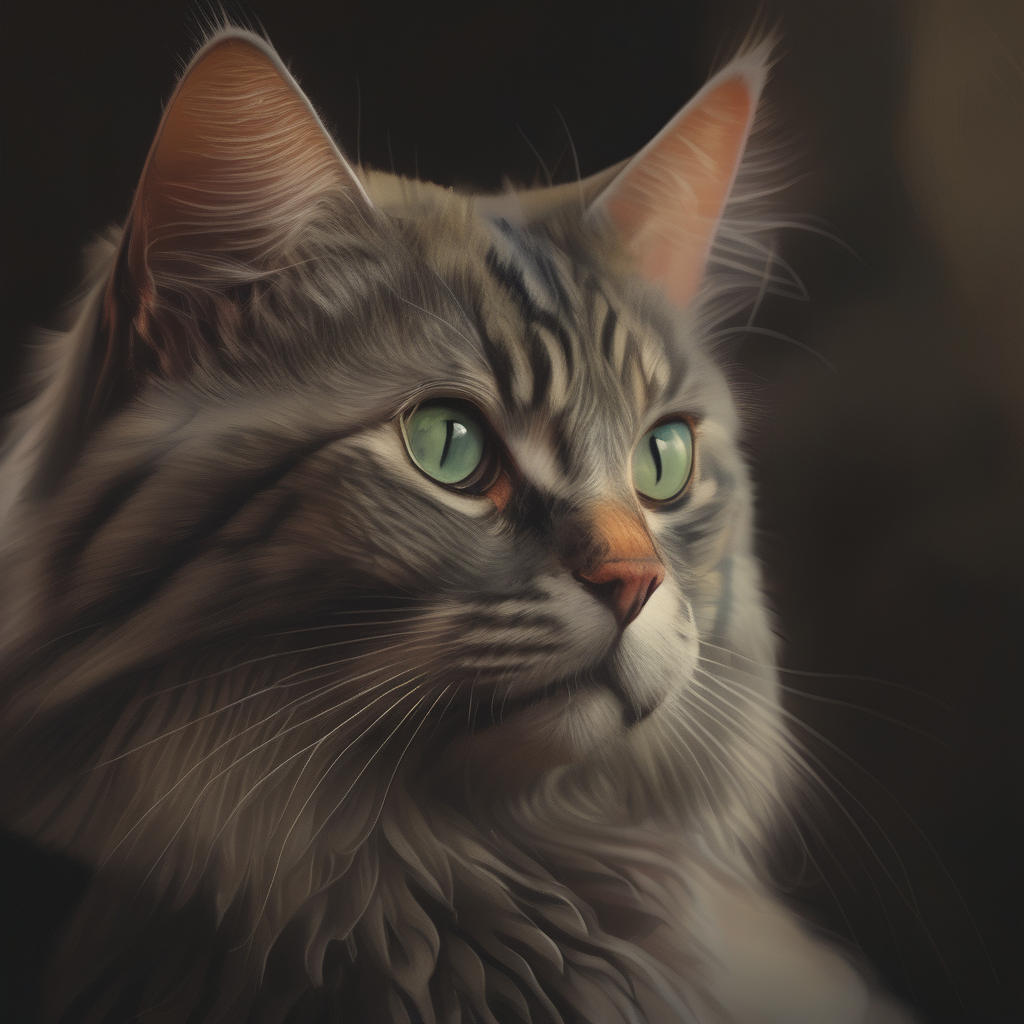

In [12]:
image